In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Testing the square lattice Landau levels

[-3.97545630739383, -3.926368922181489, -3.8772815369691487, -3.8281941517568083, -3.7791067665444675, -3.730019381332127, -3.680931996119787, -3.631844610907446, -3.5827572256951057, -3.533669840482765]


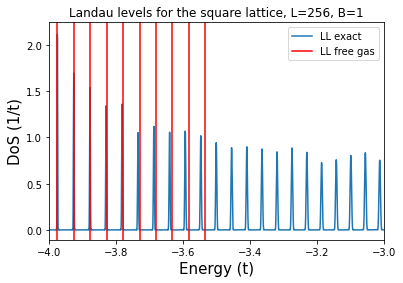

In [27]:


basedir = "/home/simao/projects_sync/codes/kestrel/kestrel/tests/"
filename1 = basedir + "dos_N4096_W0.000000_C0.000000_B1.dat"
dos = np.loadtxt(filename1)

L = 256
t = 1
N = 256
landau = [-4*t + 4*np.pi/N*t*(n+0.5) for n in range(10)]
print(landau)

fig, axs = plt.subplots()
axs.plot(dos[:,0], dos[:,1], label="LL exact")
axs.set_xlim(-4,-3)

axs.axvline(landau[0], color='r', label="LL free gas")
for ll in landau[1:]:
    axs.axvline(ll, color='r')
    
axs.set_xlabel("Energy (t)", fontsize=15)
axs.set_ylabel("DoS (1/t)", fontsize=15)
axs.set_title("Landau levels for the square lattice, L=256, B=1")
axs.legend()
plt.show()


# Testing for the new geometry

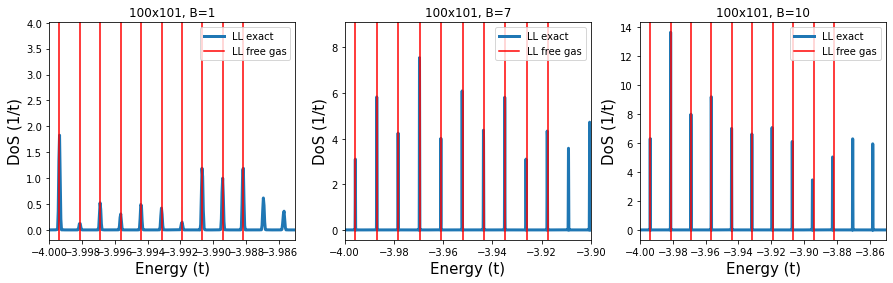

In [81]:
# Testing a nontrivial geometry for several fields and comparing with theory

# Lattice parameters
N1 = 100
N2 = 101
t  = 1

fig, axs = plt.subplots(1,3)
fig.set_figwidth(15)
Bs = [1,7,10]
NBs = len(Bs)
basedir = "/home/simao/projects_sync/codes/kestrel/kestrel/tests/test8/"

for bb in range(NBs):
    B = Bs[bb]
    filename1 = basedir + "dos_N65536_W0.000000_C0.000000_B{0}.dat".format(B)
    dos = np.loadtxt(filename1)

    
    M12 = B
    M21 = B
    

    flux = np.abs(M12/N1 - M21/N2)
    hw = 4*np.pi*t*flux
    landau = [-4*t + hw*(n+0.5) for n in range(10)]
    
    axs[bb].plot(dos[:,0], dos[:,1], linewidth=3, label="LL exact")
    

    axs[bb].axvline(landau[0], color='r', label="LL free gas")
    for ll in landau[1:]:
        axs[bb].axvline(ll, color='r')

    axs[bb].set_xlabel("Energy (t)", fontsize=15)
    axs[bb].set_ylabel("DoS (1/t)", fontsize=15)
    axs[bb].set_title("100x101, B={0}".format(B))
    axs[bb].legend()
    
axs[0].set_xlim(-4,-3.985)
axs[1].set_xlim(-4,-3.9)
axs[2].set_xlim(-4,-3.85)
plt.show()


# Testing the graphene lattice Landau levels

$$ E_{n}=\text{sgn}\left(n\right)3ta\sqrt{\frac{e}{2\hbar}Bn} $$

$$ E_{n}=\text{sgn}\left(n\right)t\sqrt{2\sqrt{3}\pi n\left(\frac{M_{12}}{N_{1}}-\frac{M_{21}}{N_{2}}\right)} $$

In [89]:
basedir = "/home/simao/projects_sync/codes/kestrel/kestrel/tests/test7/"
# basedir = "/home/simao/projects_sync/magnetic/shubnikov_de_haas/simulations/test2/13817004/"

B = 1
filename1 = basedir + "dos_N65536_W0.000000_C0.000000_B{0}.dat".format(B)


dos = np.loadtxt(filename1)

M12 = B
M21 = B
N1 = 100
N2 = 101
flux = np.abs(M12/N1 - M21/N2)
cc = flux*2*np.sqrt(3)*np.pi
landau = [np.sqrt(n*cc) for n in range(10)]
landau += [-np.sqrt(n*cc) for n in range(1,10)]

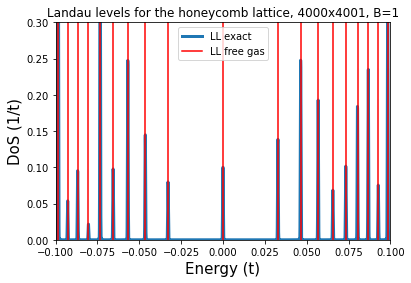

In [86]:
fig, axs = plt.subplots()
axs.plot(dos[:,0], dos[:,1], linewidth=3, label="LL exact")

axs.axvline(landau[0], color='r', label="LL free gas")
for ll in landau[1:]:
    axs.axvline(ll, color='r')
    
lim = 0.1
axs.set_xlim(-lim, lim)
axs.set_ylim(0,0.3)
axs.set_xlabel("Energy (t)", fontsize=15)
axs.set_ylabel("DoS (1/t)", fontsize=15)
axs.set_title("Landau levels for the honeycomb lattice, 4000x4001, B=1")
axs.legend()
plt.show()


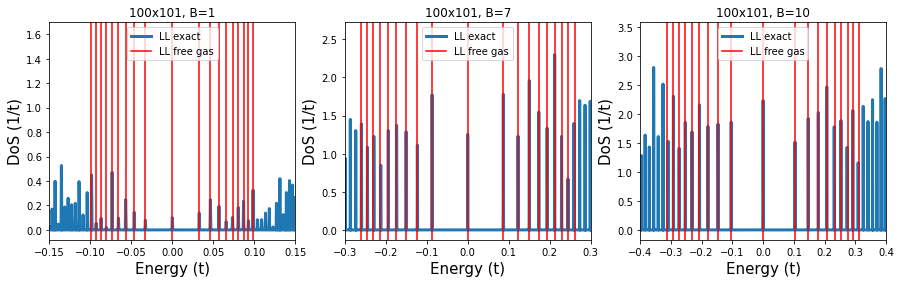

In [92]:

# Lattice parameters
N1 = 100
N2 = 101
t  = 1

fig, axs = plt.subplots(1,3)
fig.set_figwidth(15)
Bs = [1,7,10]
# NBs = len(Bs)

for bb in range(NBs):
    B = Bs[bb]
    filename1 = basedir + "dos_N65536_W0.000000_C0.000000_B{0}.dat".format(B)
    dos = np.loadtxt(filename1)

    
    M12 = B
    M21 = B
    

    flux = np.abs(M12/N1 - M21/N2)
    cc = flux*2*np.sqrt(3)*np.pi
    landau = [np.sqrt(n*cc) for n in range(10)]
    landau += [-np.sqrt(n*cc) for n in range(1,10)]
    
    axs[bb].plot(dos[:,0], dos[:,1], linewidth=3, label="LL exact")
    

    axs[bb].axvline(landau[0], color='r', label="LL free gas")
    for ll in landau[1:]:
        axs[bb].axvline(ll, color='r')

    axs[bb].set_xlabel("Energy (t)", fontsize=15)
    axs[bb].set_ylabel("DoS (1/t)", fontsize=15)
    axs[bb].set_title("100x101, B={0}".format(B))
    axs[bb].legend()
    
axs[0].set_xlim(-0.15,0.15)
axs[1].set_xlim(-0.3,0.3)
axs[2].set_xlim(-0.4,0.4)
plt.show()